In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos

plt.rcParams.update({"axes.grid": True, "font.size": 14})

In [33]:
from numpy import sum, isrealobj, sqrt
from numpy.random import standard_normal


def awgn(s, SNRdB, L=1):
    """
    AWGN channel
    Add AWGN noise to input signal. The function adds AWGN noise vector to signal 's' to generate a resulting signal vector 'r' of specified SNR in dB. It also
    returns the noise vector 'n' that is added to the signal 's' and the power spectral density N0 of noise added
    Parameters:
        s : input/transmitted signal vector
        SNRdB : desired signal to noise ratio (expressed in dB) for the received signal
        L : oversampling factor (applicable for waveform simulation) default L = 1.
    Returns:
        r : received signal vector (r=s+n)
    """
    gamma = 10 ** (SNRdB / 10)  # SNR to linear scale
    if s.ndim == 1:  # if s is single dimensional vector
        P = L * sum(abs(s) ** 2) / len(s)  # Actual power in the vector
    else:  # multi-dimensional signals like MFSK
        P = L * sum(sum(abs(s) ** 2)) / len(s)  # if s is a matrix [MxN]
    N0 = P / gamma  # Find the noise spectral density
    if isrealobj(s):  # check if input is real/complex object type
        n = sqrt(N0 / 2) * standard_normal(s.shape)  # computed noise
    else:
        n = sqrt(N0 / 2) * (standard_normal(s.shape) + 1j * standard_normal(s.shape))
    r = s + n  # received signal

    return r

In [34]:
M = 4
info = np.random.randint(0, M, 1000)
info_mod = np.exp(1j * 2 * pi * info / M, dtype=complex)
info_noise = awgn(info_mod, 20)

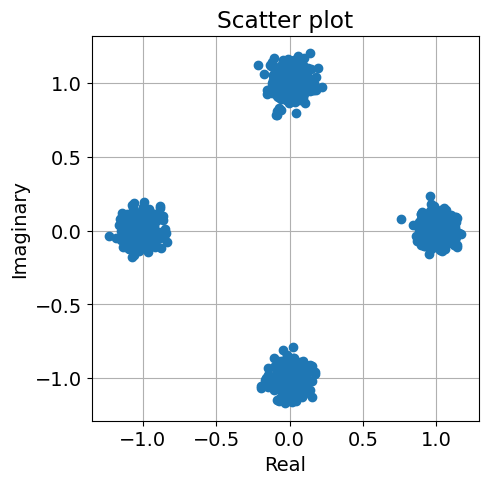

In [36]:
# scatter plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(np.real(info_noise), np.imag(info_noise), "o")
ax.set_title("Scatter plot")
ax.set_xlabel("Real")
ax.set_ylabel("Imaginary")

plt.show()

In [45]:
# retrieve the angle of each point
angles = np.angle(info_noise) * 180 / np.pi
angles

array([-9.28829336e+00,  8.76911139e+01, -8.53112876e+01, -8.29034421e+01,
        9.11011407e+01,  9.34075743e+01, -9.30722113e+01,  1.75844874e+02,
        8.97077943e+01, -8.77596576e+01,  9.26873535e+01,  9.90920485e+01,
       -8.59415673e+01, -9.04137560e+01,  2.86580536e+00, -9.65182996e+01,
       -1.30074509e+00,  7.06593708e+00,  8.92754285e+01,  4.84510872e+00,
        2.75323989e+00, -8.88341146e+01,  3.11343180e+00,  9.57749251e+01,
        1.25569474e+00, -1.76384487e+02, -9.11402728e+01,  5.75626778e+00,
        8.14653647e+01,  1.77969949e+02, -8.15562664e+01, -8.91210182e+01,
       -8.88877820e+01, -8.93653748e+01,  1.54535134e+00,  9.23286235e+01,
       -8.83231467e+01,  8.78071266e+01,  9.25444453e+01, -1.75271993e+02,
        1.74400088e+02, -1.79427936e+02, -9.38711658e+01, -1.79179764e+02,
        8.76620955e+01, -4.42079678e+00, -9.08663481e+01,  9.67589014e+01,
        8.63667868e+01,  8.44949400e+01, -6.67590335e+00,  1.37517667e+01,
        8.99154498e+01, -